In [63]:
import pandas as pd

In [64]:
dataframe = pd.read_csv("../Data/PCD data after 2020-7.csv")

In [65]:
dataframe.head()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq
0,515454,76t,ศูนย์การศึกษานอกโรงเรียน,"Non-Formal Education Centre, Mea Sot",GROUND,16.750102,98.591312,2020-07-20,21:00:00,8.0,22.0,4.0,NaN,0.13,13.0,1,"ต.แม่ปะ อ.แม่สอด, ตาก","MaePa, MaeSot, Tak",2020-07-20 21:00:00.000
1,515455,81t,อ่างเก็บน้ำประปา,Water reservoir,GROUND,13.832076,100.057961,2020-07-20,21:00:00,10.0,24.0,9.0,1.0,0.58,27.0,1,"ต.นครปฐม อ.เมือง, นครปฐม","Mueang, Nakhon Pathom",2020-07-20 21:00:00.000
2,515456,47t,สถานีสูบน้ำประตูพลแสน,Municipal Waste Water Pumping Station,GROUND,14.979726,102.098301,2020-07-20,21:00:00,17.0,35.0,12.0,0.0,0.61,7.0,1,"ต.ในเมือง อ.เมือง, นครราชสีมา","Nai Mueang, Mueang, Nakhon Ratchasima",2020-07-20 21:00:00.000
3,515457,m3,สำนักงานพระพุทธศาสนา จังหวัดนครศรีธรรมราช,Office Of Buddhism Nakhon Si Thammarat,MOBILE,8.427328,99.963666,2020-07-20,20:00:00,10.0,24.0,NaN,NaN,NaN,NaN,1,"ต.ในเมือง อ.เมือง, นครศรีธรรมราช","Mueang, Nakhon Si Thammarat",2020-07-20 20:00:00.000
4,515458,o26,โรงพยาบาลส่งเสริมสุขภาพตำบลเขาพระบาท อ.เชียรให...,"Khao Phra Bat Health Promotion Hospital, Chian...",MOBILE,8.064768,100.191452,2020-07-20,21:00:00,6.0,NaN,NaN,NaN,NaN,NaN,1,"ต.เขาพระบาท อ.เชียรใหญ่, นครศรีธรรมราช","Khao Phra Bat, Chian Yai, Nakhon Si Thammarat",2020-07-20 21:00:00.000


In [66]:
dataframe["areaTH"].nunique()

188

In [67]:
dataframe["areaEN"].value_counts().tail(20)

Khao Phra Bat, Chian Yai, Nakhon Si Thammarat                                           2150
Tambon Rahaeng, Amphoe Mueang, Tak                                                      2082
 Nai Mueang Subdistrict, Mueang District, Roi Et                                        1871
Khuan Maphrao, Mueang, Phatthalung                                                      1849
Mae Chaem,Chiang Mai                                                                    1611
Mueang, Phangnga                                                                        1521
Racha Thewa Subdistrict, Bang Phli District, Samut Prakan                               1411
Dokmai Subdistrict, Prawet District, Bangkok                                            1380
Mueang, Phitsanulok                                                                     1324
Mueang District, Ranong                                                                 1289
 Bang Man Subdistrict, Mueang District, Sing Buri                     

In [68]:
dataframe["stationID"].nunique()

151

In [69]:
province = dataframe["nameEN"].apply(lambda x : x.split(', ')[-1])

In [70]:
province.head()

0                                   Mea Sot
1                           Water reservoir
2     Municipal Waste Water Pumping Station
3    Office Of Buddhism Nakhon Si Thammarat
4                       Nakhon Si Thammarat
Name: nameEN, dtype: object

In [71]:
province.nunique()

150

In [72]:
dataframe[["lat","long"]].head()

,lat,long
0,16.750102,98.591312
1,13.832076,100.057961
2,14.979726,102.098301
3,8.427328,99.963666
4,8.064768,100.191452


In [73]:
provinceName=['เชียงราย', 
'เชียงใหม่',
'น่าน', 
'พะเยา', 
'แพร่', 
'แม่ฮ่องสอน', 
'ลำปาง', 
'ลำพูน', 
'อุตรดิตถ์',
'กาฬสินธ์ุ',
'ขอนแก่น',
'ชัยภูมิ',
'นครพนม',
'นครราชสีมา',
'บึงกาฬ',
'บุรีรัมย์',
'มหาสารคาม',
'มุกดาหาร',
'ยโสธร',
'ร้อยเอ็ด',
'เลย',
'สกลนคร',
'สุรินทร์',
'ศรีสะเกษ',
'หนองคาย',
'หนองบัวลำภู',
'อุดรธานี',
'อุบลราชธานี',
'อำนาจเจริญ',
'กำแพงเพชร',
'ชัยนาท',
'นครนายก',
'นครปฐม',
'นครสวรรค์',
'นนทบุรี',
'ปทุมธานี',
'พระนครศรีอยุธยา',
'พิจิตร',
'พิษณุโลก',
'เพชรบูรณ์',
'ลพบุรี',
'สมุทรปราการ',
'สมุทรสงคราม',
'สมุทรสาคร',
'สิงห์บุรี',
'สุโขทัย',
'สุพรรณบุรี',
'สระบุรี',
'อ่างทอง',
'อุทัยธานี',
'จันทบุรี',
'ฉะเชิงเทรา', 
'ตราด',
'ปราจีนบุรี',
'ระยอง',
'สระแก้ว',
'กาญจนบุรี',
'ตาก',
'ประจวบคีรีขันธ์',
'เพชรบุรี',
'ราชบุรี',
'กระบี่',
'ชุุมพร',
'ตรัง',
'นครศรีธรรมราช',
'นราธิวาส',
'ปัตตานี',
'พังงา',
'พัทลุง',
'ภูเก็ต',
'ระนอง',
'สตูล',
'สงขลา',
'สุราษฎร์ธานี',
'ยะลา',
'กรุงเทพฯ',
'ชลบุรี']

In [74]:
dataframe["areaTH"].replace({"แขวงคลองกุ่ม เขตบึงกุ่ม":"กรุงเทพฯ","เขตปลอดอากรท่าอากาศยานสุวรรณภูมิ":"สมุทรปราการ","หมู่บ้านทูแกรนด์โมนาโค":"กรุงเทพฯ","หมู่บ้านแกรนด์โมนาโค":"กรุงเทพฯ","หมู่บ้านลลิน กรีนวิลล์":"กรุงเทพฯ","แขวงดอกไม้ เขตประเวศ, กรุงเทพมหานคร":"กรุงเทพฯ"},inplace=True)

In [75]:
def checkContainProvince(x):
    for i in range (0,len(provinceName)):
        if (provinceName[i] in x):
            return i 
    #print(x)
    return -1    
        

In [76]:
dataframe['provinceNo'] = dataframe['areaTH'].apply(lambda x : checkContainProvince(x))

In [77]:
dataframe['provinceNo'].value_counts().head(10)

75    771078
54     78403
41     75091
6      52039
1      40766
76     37951
43     26327
0      26219
65     26210
74     26131
Name: provinceNo, dtype: int64

In [78]:
filter = dataframe['provinceNo'] == -1

In [79]:
dataframe[filter].head()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq,provinceNo


In [80]:
dataframe['provinceNo'].nunique()

65

In [81]:
dataframe['provinceNo'].unique()

array([57, 32, 13, 64, 33, 34, 65,  2, 35, 53, 66, 36,  3, 67, 68, 69, 74,
       70, 54, 60,  6,  7, 72, 71, 41, 42, 43, 47, 55, 46, 73, 24, 49, 27,
        0,  1, 20,  4,  5, 75, 56, 10, 61, 76, 63, 52, 51, 21, 19,  9, 15,
       37, 38,  8, 45, 40, 11, 39, 29, 12, 14, 17, 26, 44, 31],
      dtype=int64)

In [82]:
for i in range(0,len(provinceName)):
    if i not in dataframe['provinceNo'].unique():
        print(provinceName[i])

มหาสารคาม
ยโสธร
สุรินทร์
ศรีสะเกษ
หนองบัวลำภู
อำนาจเจริญ
ชัยนาท
อ่างทอง
จันทบุรี
ประจวบคีรีขันธ์
เพชรบุรี
ชุุมพร


In [83]:
dataframe.tail()

,id,stationID,nameTH,nameEN,stationType,lat,long,date_aq,time_aq,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,datetime_aq,provinceNo
1748632,2307327,bkp88t,มหาวิทยาลัยสยาม,Siam University,BKK,13.718689,100.453910,2022-01-30,09:00:00,33.0,NaN,NaN,NaN,NaN,NaN,2,"ริมถนนเพชรเกษม เขตภาษีเจริญ, กรุงเทพฯ","Petchkasem Roadside, Phasi Charoen, Bangkok",2022-01-30 09:00:00.000,75
1748633,2307297,bkp58t,สำนักงานเขตราษฎร์บูรณะ กรุงเทพฯ,"Rat Burana District Office, Bangkok",BKK,13.682136,100.506051,2022-01-30,09:00:00,30.0,78.0,NaN,NaN,NaN,NaN,2,"ริมถนนราษฎร์บูรณะ, เขตราษฎร์บูรณะ, กรุงเทพฯ","Rat Burana, Bangkok",2022-01-30 09:00:00.000,75
1748634,2307298,bkp59t,สำนักงานเขตราชเทวี กรุงเทพฯ,"Ratchathewi District Office, Bangkok",BKK,13.759085,100.534579,2022-01-30,09:00:00,32.0,40.0,NaN,NaN,NaN,NaN,2,"ริมถนนพญาไท เขตราชเทวี, กรุงเทพฯ","Phayathai Roadside, Ratchathewi, Bangkok",2022-01-30 09:00:00.000,75
1748635,2307299,bkp60t,ริมสวนหย่อมตรงข้ามสำนักงานเขตดุสิต,"Dusit District Office, Bangkok",BKK,13.776664,100.520982,2022-01-30,09:00:00,26.0,56.0,NaN,NaN,NaN,NaN,2,"ริมถนนพระราม 5 เขตดุสิต, กรุงเทพฯ","RamaV Roadside, Dusit, Bangkok",2022-01-30 09:00:00.000,75
1748636,2307300,bkp61t,สำนักงานคณะกรรมการพัฒนาเศรษฐกิจและสังคมแห่งชาติ,National Economic and Social Development Counc...,BKK,13.756281,100.514267,2022-01-30,09:00:00,23.0,49.0,NaN,NaN,NaN,NaN,1,"ริมถนนกรุงเกษม เขตป้อมปราบศัตรูพ่าย, กรุงเทพฯ","Krung Kasem Roadside, Pom Prap Sattru Phai, Ba...",2022-01-30 09:00:00.000,75


# หาตัวแทนข้อมูลของแต่ละจังหวัด

In [84]:
dataframe.drop('id',axis=1,inplace=True)

In [85]:
dataframe.dropna(subset=['PM25'],inplace=True)

In [86]:
dataframe[['PM25','CO','O3']].isnull().sum()

PM25          0
CO      1189872
O3       897967
dtype: int64

In [87]:
dfPM25 = dataframe.groupby(['date_aq','provinceNo'])['PM25'].mean()

In [88]:
dfPM25 = dfPM25.to_frame()
dfPM25

PM25
date_aq    provinceNo           
2020-07-20 0            9.000000
           1           17.444444
           2            7.777778
           3            6.000000
           4           11.250000
...                          ...
2022-01-30 71          18.888889
           72          24.888889
           74          22.555556
           75          27.171239
           76          22.759259

[28192 rows x 1 columns]

# Convert PM25 from per day to per week

Filter only 1st 8th 15th 22th date of each month

In [89]:
df_struct = {
    "date":[],
    "provinceNo":[],
    "pm25":[]
}
dfPM25perweek = pd.DataFrame(df_struct)

Find intersect province between pm25 and o3 , co

In [90]:
provinceNoInPM25 = dataframe['provinceNo'].unique()

In [91]:
print(provinceNoInPM25)

[57 32 13 64 33 34 65  2 35 53 66 36  3 67 68 69 74 70 54 60  6  7 72 71
 41 42 43 47 55 46 73 24 49 27  0  1 20  4  5 75 56 10 61 76 63 52 51 21
 19  9 15 37 38  8 45 40 11 39 29 12 14 17 26 44 31]


In [92]:
provinceDictO3 = {"yala":[74,"6.506;101.341;9"],"satun":[71,"6.680;100.403;9"], "songkhla":[72,"7.125;100.658;9"],"trang":[63,"7.493;99.926;9"], \
"nakhon-si-thammarat":[65-1,"8.227;99.789;9"],"wichit":[70-1,"8.038;98.722;9"],"surat-thani":[74-1,"9.115;99.007;9"],"ranong":[71-1,"9.863;98.867;9"], \
"kanchanaburi":[57-1,"13.923;100.349;9"] , "samut-sakhon":[44-1,"13.931;100.267;9"], "bangkok":[76-1,"13.931;100.267;9"] , "samut-prakan":[42-1,"13.931;100.267;9"] , \
"mueang-nonthaburi":[35-1,"13.931;100.267;9"] , \
"pathum-thani":[36-1,"13.931;100.267;9"] , "phra-nakhon-si-ayutthaya" : [37-1,"13.931;100.267;9"]  , "saraburi":[48-1,"14.475;100.437;9"] , \
"lop-buri":[41-1,"14.475;100.437;9"] , "sing-buri":[45-1,"14.475;100.437;9"] , "prachin-buri":[54-1,"14.475;100.437;9"] , "nakhon-nayok":[32-1,"14.475;100.437;9"] , \
"chiang-rai":[1-1, "19.22;99.99;8"], "mae-hong-son":[6-1, "19.02;97.87;8"], "phayao":[4-1, "19.10;100.27;8"], "nan":[3-1, "18.79;100.80;8"], \
"chiang-mai":[2-1, "18.93;99.06;8"], "lamphun":[8-1, "18.50;99.07;8"], "lampang":[7-1, "18.35;99.42;8"], "phrae":[5-1, "18.17;100.26;8"], "uttaradit":[9-1, "17.55;100.10;8"], \
"sukhothai":[46-1, "16.96;99.97;8"], "tak":[58-1, "16.83;99.18;8"], "phitsanulok":[39-1, "16.83;100.20;8"], "kamphaeng-phet":[30-1, "16.35;99.30;8"], "phichit":[38-1, "16.37;100.45;8"], \
"phetchabun":[40-1, "16.50;101.39;8"], "nakhon-sawan":[34-1, "15.73;100.26;8"], "uthai-thani":[50-1, "15.35;100.12;8"], "nong-khai":[25-1, "17.91;102.82;8"], \
"loei":[21-1, "17.47;101.90;8"], "udon-thani":[27-1, "17.50;102.79;8"], "nakhon-phanom":[13-1, "17.41;104.73;8"], \
"sakon-nakhon":[22-1, "17.17;104.19;8"], "khon-kaen":[11-1, "16.34;102.69;8"], "kalasin":[10-1, "16.50;103.73;8"], \
"roi-et":[20-1, "16.10;103.69;8"],  "chaiyaphum":[12-1, "15.87;102.05;8"], \
"ubon-ratchathani":[28-1, "14.98;105.17;8"], "buriram":[16-1, "14.84;102.88;8"], \
"nakhon-ratchasima":[14-1,"14.85;102.04;8"], "chon-buri":[77-1, "13.25;101.13;8"], "rayong":[55-1, "12.67;101.21;8"], "trat":[52, "12.25;102.55;8"]}

In [93]:
provinceNoInO3 = []
for (k,v) in provinceDictO3.items():
    provinceNoInO3.append(v[0])

In [94]:
print(provinceNoInO3)

[74, 71, 72, 63, 64, 69, 73, 70, 56, 43, 75, 41, 34, 35, 36, 47, 40, 44, 53, 31, 0, 5, 3, 2, 1, 7, 6, 4, 8, 45, 57, 38, 29, 37, 39, 33, 49, 24, 20, 26, 12, 21, 10, 9, 19, 11, 27, 15, 13, 76, 54, 52]


In [95]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [96]:
provinceNoIntersect = intersection(provinceNoInPM25,provinceNoInO3)
print(provinceNoIntersect)

[57, 13, 64, 33, 34, 2, 35, 53, 36, 3, 69, 74, 70, 54, 6, 7, 72, 71, 41, 43, 47, 73, 24, 49, 27, 0, 1, 20, 4, 5, 75, 56, 10, 76, 63, 52, 21, 19, 9, 15, 37, 38, 8, 45, 40, 11, 39, 29, 12, 26, 44, 31]


In [97]:
len(provinceNoIntersect)

52

In [98]:
len(provinceNoInO3)

52

In [99]:
yearList = ["2020","2021","2022"]
monthList = ["01","02","03","04","05","06","07","08","09","10","11","12"]
dayList = ["01","08","15","22"]
def nextDay(date):
    year=date[0:4]
    month=date[4:6]
    day=date[6:8]
    if day =="22":
        day=dayList[0]
        if month != "12":
            month=monthList[monthList.index(month)+1]
        else:
            month="01"
            year=yearList[yearList.index(year)+1]
    else:
        day=dayList[dayList.index(day)+1]
    return year+month+day

In [100]:
validDate=[]
initialDate="20200722"
date=initialDate
validDate.append(initialDate)
while date < "20220122":
    temp = nextDay(date)
    validDate.append(temp)
    date = temp
print(validDate)

['20200722', '20200801', '20200808', '20200815', '20200822', '20200901', '20200908', '20200915', '20200922', '20201001', '20201008', '20201015', '20201022', '20201101', '20201108', '20201115', '20201122', '20201201', '20201208', '20201215', '20201222', '20210101', '20210108', '20210115', '20210122', '20210201', '20210208', '20210215', '20210222', '20210301', '20210308', '20210315', '20210322', '20210401', '20210408', '20210415', '20210422', '20210501', '20210508', '20210515', '20210522', '20210601', '20210608', '20210615', '20210622', '20210701', '20210708', '20210715', '20210722', '20210801', '20210808', '20210815', '20210822', '20210901', '20210908', '20210915', '20210922', '20211001', '20211008', '20211015', '20211022', '20211101', '20211108', '20211115', '20211122', '20211201', '20211208', '20211215', '20211222', '20220101', '20220108', '20220115', '20220122']


In [101]:
len(validDate)

73

In [102]:
validDate = list(map(lambda x :x[0:4]+"-"+x[4:6]+"-"+x[6:8] ,validDate))
print(validDate)

['2020-07-22', '2020-08-01', '2020-08-08', '2020-08-15', '2020-08-22', '2020-09-01', '2020-09-08', '2020-09-15', '2020-09-22', '2020-10-01', '2020-10-08', '2020-10-15', '2020-10-22', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-12-01', '2020-12-08', '2020-12-15', '2020-12-22', '2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22', '2021-02-01', '2021-02-08', '2021-02-15', '2021-02-22', '2021-03-01', '2021-03-08', '2021-03-15', '2021-03-22', '2021-04-01', '2021-04-08', '2021-04-15', '2021-04-22', '2021-05-01', '2021-05-08', '2021-05-15', '2021-05-22', '2021-06-01', '2021-06-08', '2021-06-15', '2021-06-22', '2021-07-01', '2021-07-08', '2021-07-15', '2021-07-22', '2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22', '2021-09-01', '2021-09-08', '2021-09-15', '2021-09-22', '2021-10-01', '2021-10-08', '2021-10-15', '2021-10-22', '2021-11-01', '2021-11-08', '2021-11-15', '2021-11-22', '2021-12-01', '2021-12-08', '2021-12-15', '2021-12-22', '2022-01-01', '2022-01-08', '2022

In [103]:
dfPM25.reset_index(inplace=True)

In [104]:
dfPM25.tail()

,date_aq,provinceNo,PM25
28187,2022-01-30,71,18.888889
28188,2022-01-30,72,24.888889
28189,2022-01-30,74,22.555556
28190,2022-01-30,75,27.171239
28191,2022-01-30,76,22.759259


In [105]:
dfPM25_filtered = dfPM25[dfPM25['date_aq'].isin(validDate)]

dfPM25_filtered =  dfPM25_filtered[dfPM25_filtered['provinceNo'].isin(provinceNoIntersect)]

In [106]:
dfPM25_filtered.tail()

,date_aq,provinceNo,PM25
27720,2022-01-22,72,13.958333
27721,2022-01-22,73,15.833333
27722,2022-01-22,74,14.685185
27723,2022-01-22,75,17.225225
27724,2022-01-22,76,15.666667


In [107]:
dfPM25_filtered.rename({'date_aq':'date'},axis=1, inplace=True)

In [108]:
dfPM25_filtered.head()

,date,provinceNo,PM25
94,2020-07-22,0,9.062500
95,2020-07-22,1,9.276596
96,2020-07-22,2,8.458333
97,2020-07-22,3,9.458333
98,2020-07-22,4,11.333333


# Merge PM25 with O3 and CO data

In [109]:
def prep(path):
    df = pd.read_csv(path)
    df = df.drop(columns=df.columns[0], axis=1)
    df['provinceNo'] = df['provinceNo'].astype(int)
    df['date'] = df['date'].astype(str)
    df['date'] = df['date'].apply(lambda x : x[0:4]+"-"+x[4:6]+"-"+x[6:8])
    return df

In [110]:
dfO3 = prep("../ScrapedData/O3Data.csv")
dfCO = prep("../ScrapedData/COData.csv")

In [111]:
df_merge_temp = dfPM25_filtered.merge(dfO3,on=['date','provinceNo'])
df_merge = df_merge_temp.merge(dfCO,on=['date','provinceNo'])
df_merge.rename({"o3":"O3","co":"CO"},axis=1,inplace=True)
df_merge.head()

,date,provinceNo,PM25,O3,CO
0,2020-07-22,0,9.062500,62,120
1,2020-07-22,1,9.276596,42,110
2,2020-07-22,2,8.458333,32,120
3,2020-07-22,3,9.458333,56,120
4,2020-07-22,4,11.333333,61,190


# KMeans

In [112]:
from sklearn.cluster import KMeans

In [113]:
df20200722 = df_merge[df_merge['date'] == '2020-12-15'].iloc[:,2:]
df20200722.head()

,PM25,O3,CO
701,30.586207,109,400
702,23.293103,128,490
703,23.785714,59,350
704,43.250000,64,270
705,29.916667,60,270


In [114]:
from sklearn.preprocessing import StandardScaler

In [154]:
def clusterOneday(date):
    df_DateProvinceNo = df_merge[df_merge['date'] == date].iloc[:,:2]
    df = df_merge[df_merge['date'] == date].iloc[:,2:]
    scaler = StandardScaler()
    scaler.fit(df)
    trans_df = scaler.transform(df)

    kmeans = KMeans(n_clusters=3,random_state=2022) #might change as there will be 3 features
    kmeans.fit(trans_df)
    # print(kmeans.cluster_centers_)
    # print(kmeans.labels_)
    # print(trans_df)
    predict_df = pd.DataFrame(kmeans.predict(trans_df),columns=['cluster'])
    predict_df.insert(0,"provinceNo",df_DateProvinceNo['provinceNo'].to_list())
    predict_df.insert(0,"date",df_DateProvinceNo['date'].to_list())
    return predict_df


In [139]:
df_DateProvinceNo = df_merge[df_merge['date'] == date].iloc[:,:2]
df_DateProvinceNo['provinceNo']

36     0
37     1
38     2
39     3
40     4
41     5
42     6
43     7
44    10
45    13
46    20
47    24
48    27
49    33
50    34
51    35
52    36
53    41
54    43
55    47
56    49
57    52
58    53
59    54
60    56
61    57
62    63
63    64
64    69
65    70
66    71
67    72
68    73
69    74
70    75
71    76
Name: provinceNo, dtype: int64

In [156]:
dfCluster = clusterOneday('2020-08-08')
dfCluster

,date,provinceNo,cluster
0,2020-08-08,0,1
1,2020-08-08,1,1
2,2020-08-08,2,1
3,2020-08-08,3,1
4,2020-08-08,4,1
5,2020-08-08,5,1
6,2020-08-08,6,1
7,2020-08-08,7,1
8,2020-08-08,10,2
9,2020-08-08,13,1


In [157]:
dfCluster = clusterOneday('2020-07-22')
for e in validDate[1:]:
    dfClusterTemp = clusterOneday(e)
    dfCluster = pd.concat([dfCluster,dfClusterTemp])
display(dfCluster)

,date,provinceNo,cluster
0,2020-07-22,0,0
1,2020-07-22,1,0
2,2020-07-22,2,0
3,2020-07-22,3,0
4,2020-07-22,4,0
...,...,...,...
45,2022-01-22,72,2
46,2022-01-22,73,2
47,2022-01-22,74,2
48,2022-01-22,75,2


In [166]:
dfTesting = clusterOneday('2022-01-22')
dfTesting

,date,provinceNo,cluster
0,2022-01-22,0,2
1,2022-01-22,1,2
2,2022-01-22,2,2
3,2022-01-22,3,2
4,2022-01-22,4,0
5,2022-01-22,5,2
6,2022-01-22,6,0
7,2022-01-22,7,2
8,2022-01-22,9,0
9,2022-01-22,10,0


In [167]:
dfFinalResult = df_merge.merge(dfCluster,on=['date','provinceNo'])
dfFinalResult

,date,provinceNo,PM25,O3,CO,cluster
0,2020-07-22,0,9.062500,62,120,0
1,2020-07-22,1,9.276596,42,110,0
2,2020-07-22,2,8.458333,32,120,0
3,2020-07-22,3,9.458333,56,120,0
4,2020-07-22,4,11.333333,61,190,0
...,...,...,...,...,...,...
3097,2022-01-22,72,13.958333,65,230,2
3098,2022-01-22,73,15.833333,58,250,2
3099,2022-01-22,74,14.685185,60,230,2
3100,2022-01-22,75,17.225225,85,1010,2


In [168]:
dfFinalResult.to_csv('../Result/FinalResult.csv')

In [161]:
# elbow method
# import numpy as np
# from scipy.spatial.distance import cdist
# import matplotlib.pyplot as plt
# K = range(1, 10)
# meandistortions = []
# for k in K:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(trans_data)
#     meandistortions.append(sum(np.min(cdist(trans_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / trans_data.shape[0])

# plt.plot(K, meandistortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Average distortion')
# plt.title('Selecting k with the Elbow Method')
# plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)

[[-0.70038196  0.09319232]
 [-0.65236522 -0.89354984]
 [-0.83588261 -1.38692092]
 [-0.61160567 -0.20283033]
 [-0.19108641  0.04385521]]


In [ ]:
kmeans.fit(trans_data)

KMeans(n_clusters=5)

In [ ]:
kmeans.cluster_centers_

array([[-0.48403546, -0.17405035],
       [ 0.64283222,  1.07288632],
       [ 1.29073724, -0.71470283],
       [-0.85165209,  1.59797411],
       [-1.12213793, -1.21917476]])

In [ ]:
kmeans.labels_

array([0, 4, 4, 0, 0, 4, 3, 2, 1, 1, 0, 3, 0, 1, 0, 1, 3, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 4, 0, 0, 4, 3, 2, 2, 0, 2, 1])

In [ ]:
kmeans.predict(trans_data)

array([0, 4, 4, 0, 0, 4, 3, 2, 1, 1, 0, 3, 0, 1, 0, 1, 3, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 4, 0, 0, 4, 3, 2, 2, 0, 2, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
# plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0], 
#             color = "blue", s=100, edgecolor='green',linestyle='--')
# plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1], 
#             color = "red", s=100, edgecolor='green',linestyle='--')
# plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2], 
#             color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()

In [ ]:
org_data = scaler.inverse_transform(trans_data)
print(org_data[0:5,])

[[ 9.0625     62.        ]
 [ 9.27659574 42.        ]
 [ 8.45833333 32.        ]
 [ 9.45833333 56.        ]
 [11.33333333 61.        ]]


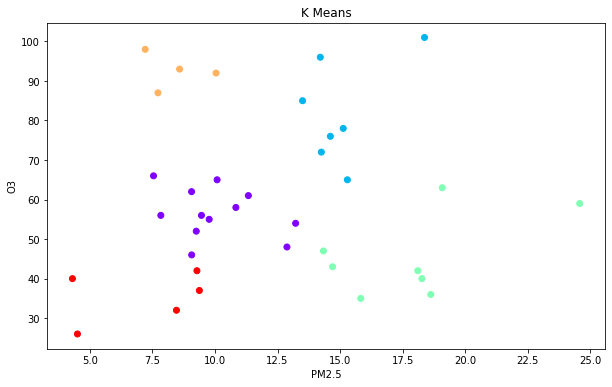

In [ ]:
f, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.set_xlabel('PM2.5')
ax1.set_ylabel('O3')
ax1.scatter(x=org_data[:,0],y=org_data[:,1],c=kmeans.labels_,cmap='rainbow')